Done!
Training accuracy for 70000epochs and 0.1 learning rate is 91.65
Regression on validation set
Validation accuracy for 70000epochs and 0.1 learning rate is 84.21%
70000 Done!


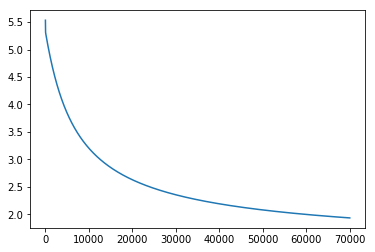

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

dataset = pd.DataFrame(pd.read_csv('wdbc.dataset', header = None))
dataset = dataset.drop(columns=0)

#separating the target set
target_set = np.array(dataset[1])
dataset = dataset.drop(columns = 1)

# mapping labels M = 1 and B = 0
for index in range(len(target_set)):
    if target_set[index] == 'M':
        target_set[index] = 1
    elif target_set[index] == 'B':
        target_set[index] = 0

#splitting dataset into training, validation and testing
my_train, my_test, target_train, target_test = train_test_split(dataset, target_set,train_size = 0.8, test_size=0.2)
my_val, my_test, target_val, target_test = train_test_split(my_test, target_test,train_size = 0.5, test_size = 0.5)

#splitting target_set into training, validation and testing
# target_train, target_test = train_test_split(target_set, train_size = 0.8, test_size = 0.2)
# target_val, target_test = train_test_split(target_test, train_size = 0.5, test_size = 0.5)

# normalizing all datasets
my_train = preprocessing.normalize(my_train)
my_val = preprocessing.normalize(my_val)
my_test = preprocessing.normalize(my_test)

# initialize weights, bias, learning rate and number of epochs 
weights = np.zeros((30, 1))
bias = 0
#l_rate_array = [0.01, 0.05, 0.1, 0.5]
l_rate = 0.1
#epochs_array = [1000, 10000, 30000, 50000, 60000, 70000]
epochs = 70000
accuracy_array = [] #used to store validation accuracy of every epoch
cost_array = [] # stores the gradient descent for every epoch
def sigmoid(z):
    # returns a value between 0 and 1 for classification
    ans =  1 /( 1 + np.exp(-z))
    return ans
    
def gradient_descent(sigma, Y, m):
    return (-np.sum(np.multiply(np.log(sigma), Y) + np.multiply((1 - Y), np.log(1 - sigma)))/m)

no_of_train = my_train.shape[0]
# no_of_val = my_val.shape[0]
# no_of_test = my_test.shape[0]
my_train = my_train.T

# Starting Training 
# for i in range(0, len(l_rate_array)):
#     l_rate = epochs_array[i]
for epoch in range(epochs):
    z = np.array(np.dot(weights.T, my_train) + bias, dtype =np.float32)
    #print(type(z))
    sigma = sigmoid(z)
    dz = sigma - target_train
    cost = gradient_descent(sigma, target_train, no_of_samples)
    cost_array.append(cost)
    dw = 1/no_of_train * np.dot(my_train, dz.T)
    db = 1 / no_of_train * np.sum(dz)
    # update weights and bias for every iteration
    weights = weights - l_rate * dw
    bias = bias - l_rate * db
    if epoch == epochs - 1:
        print('Done!')
    
plt.plot(cost_array)
# Classify values into Class 1 = M or 0 = B
sigma[sigma >= 0.5] = 1
sigma[sigma < 0.5] = 0

accuracy_training = (target_train == sigma).mean() * 100
print(f"Training accuracy for {epochs} epochs and {l_rate} learning rate is {round(accuracy_training, 2)}")

# Logistic regression for validation set - for every total epoch
print("Regression on validation set")
my_val = my_val.T
z = np.array(np.dot(weights.T, my_val) + bias, dtype=np.float32)
sigma = sigmoid(z)
sigma = sigma.ravel() # convert to flat array
    
# Classify values into Class 1 = M or 0 = B
sigma[sigma >= 0.5] = 1
sigma[sigma < 0.5] = 0

accuracy_val = (target_val == sigma).mean() * 100 # accuracy of validation set
# accuracy_array.append(accuracy_val)
print(f"Validation accuracy for {epochs} epochs and {l_rate} learning rate is {round(accuracy_val, 2)}%")
print(f"{epochs} Done!")
my_val = my_val.T

In [6]:
# Plot a graph of no of epochs vs their accuracy

# fig, ax = plt.subplots()
# ax.plot(l_rate_array, accuracy_array)
# ax.set(xlabel='Learning Rate', ylabel='Accuracy')

In [11]:
# Performing Regression on Testing Set
no_of_samples = my_test.shape[0]
my_test = my_test.T
z = np.array(np.dot(weights.T, my_test) + bias, dtype=np.float32)
sigma = sigmoid(z)
sigma = sigma.ravel()

sigma[sigma >= 0.5] = 1
sigma[sigma < 0.5] = 0

prediction = sigma.astype(int).copy()

accuracy_test = (target_test == sigma).mean() * 100
print(f"Testing accuracy is {round(accuracy_test, 2)}%")

Testing accuracy is 91.23%


In [12]:
from sklearn.metrics import confusion_matrix

# forming a confusion matrix to calculate precision and recall 
predicted = np.array(prediction)
actual = np.array(target_test.astype(int))
conf_matrix = confusion_matrix(actual, predicted)
print(conf_matrix)
test_precision = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)) * 100
test_recall = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)) * 100

print(f"Testing Precision is {round(test_precision,2)}%")
print(f"Testing recall is {round(test_recall, 2)}%")

[[39  2]
 [ 3 13]]
Testing Precision is 89.76%
Testing recall is 88.19%
